# S&P 500 Data analysis

#### Import library 

In [22]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
sb.set_style('darkgrid')

In [2]:
#!pip install pmdarima

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


#### Load data

In [23]:
stock_data = pd.read_csv('C:/Users/Christine Liou/Documents/1.Doc/Case study/Stocks.csv')  

In [24]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0


In [25]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [26]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23358 entries, 0 to 23357
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23358 non-null  datetime64[ns]
 1   Open       23358 non-null  float64       
 2   High       23358 non-null  float64       
 3   Low        23358 non-null  float64       
 4   Close      23358 non-null  float64       
 5   Adj Close  23358 non-null  float64       
 6   Volume     23358 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 MB


In [27]:
stock_data = stock_data.set_index('Date')

In [28]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0


#### Data Visualization 

<AxesSubplot:xlabel='Date'>

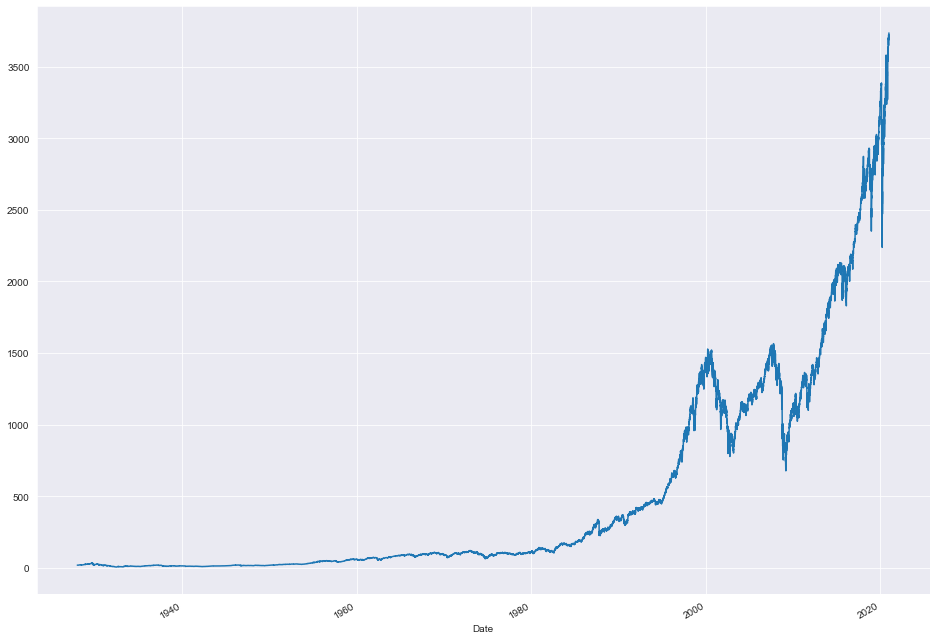

In [29]:
stock_data['Close'].plot(figsize=(16, 12))

Since the path soared from year 1998, below graph could see more clear from year 1998 until now. 

In [30]:
zoom = stock_data[(stock_data.index > '1998-01-01') & (stock_data.index <= '2020-12-28')]

<AxesSubplot:xlabel='Date'>

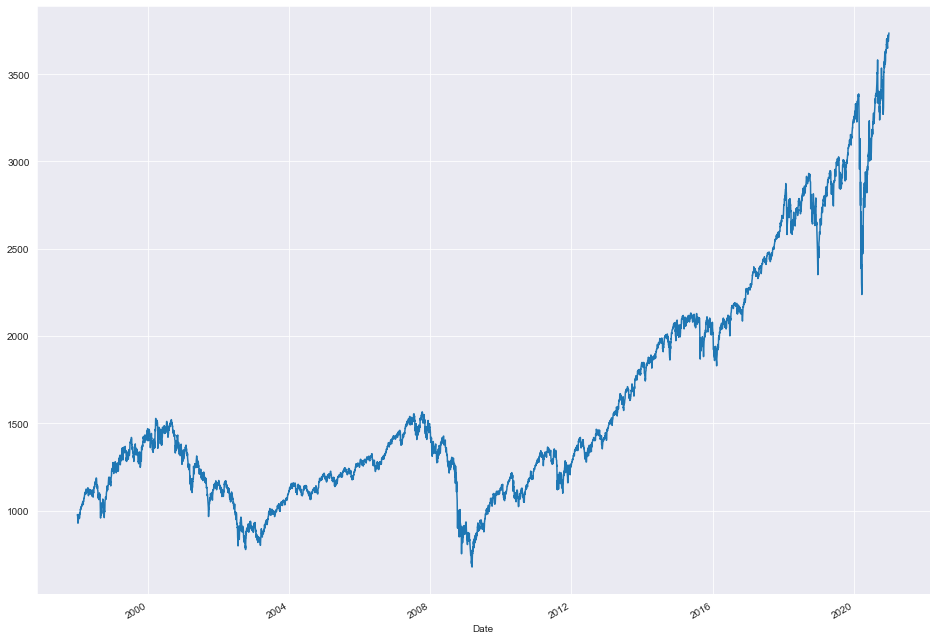

In [31]:
zoom['Close'].plot(figsize=(16, 12))

<AxesSubplot:xlabel='Date'>

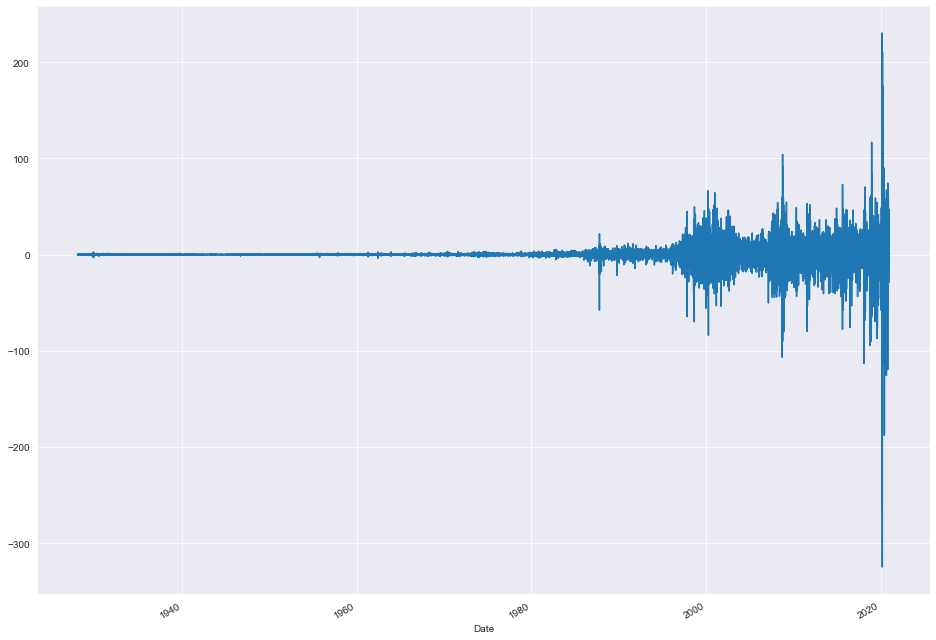

In [32]:
stock_data['First Difference'] = stock_data['Close'] - stock_data['Close'].shift()  
stock_data['First Difference'].plot(figsize=(16, 12))

C:\Users\Christine Liou\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

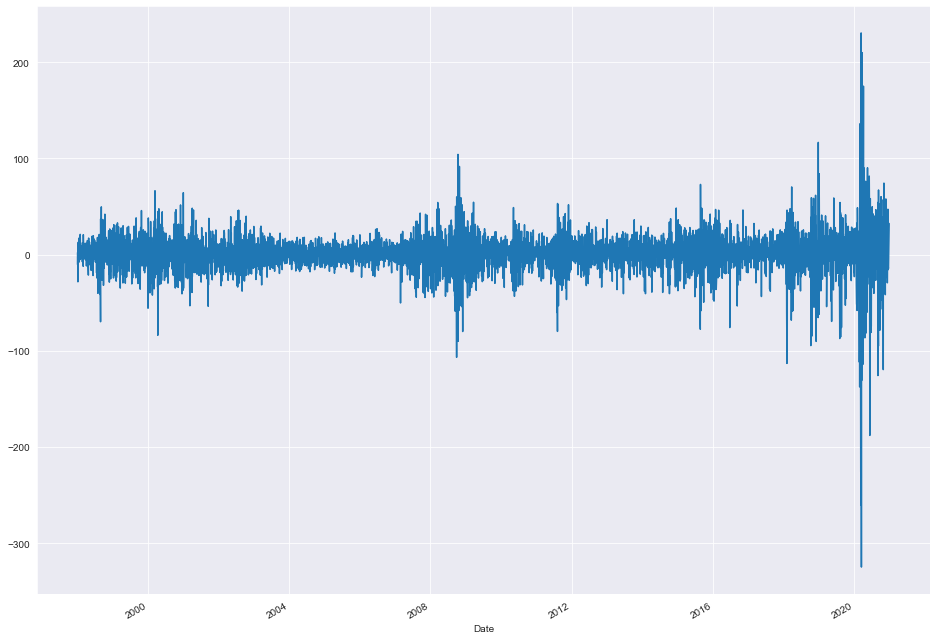

In [33]:
zoom['First Difference'] = zoom['Close'] - zoom['Close'].shift()  
zoom['First Difference'].plot(figsize=(16, 12))

#### Test Staionarity

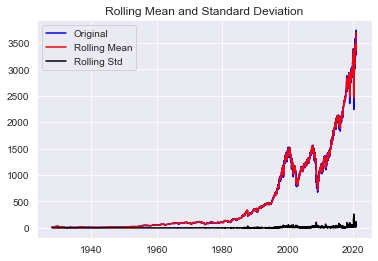

Results of dickey fuller test
Test Statistics                    4.844809
p-value                            1.000000
No. of lags used                  47.000000
Number of observations used    23310.000000
critical value (1%)               -3.430631
critical value (5%)               -2.861664
critical value (10%)              -2.566836
dtype: float64


In [35]:

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(stock_data['Close'])

C:\Users\Christine Liou\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

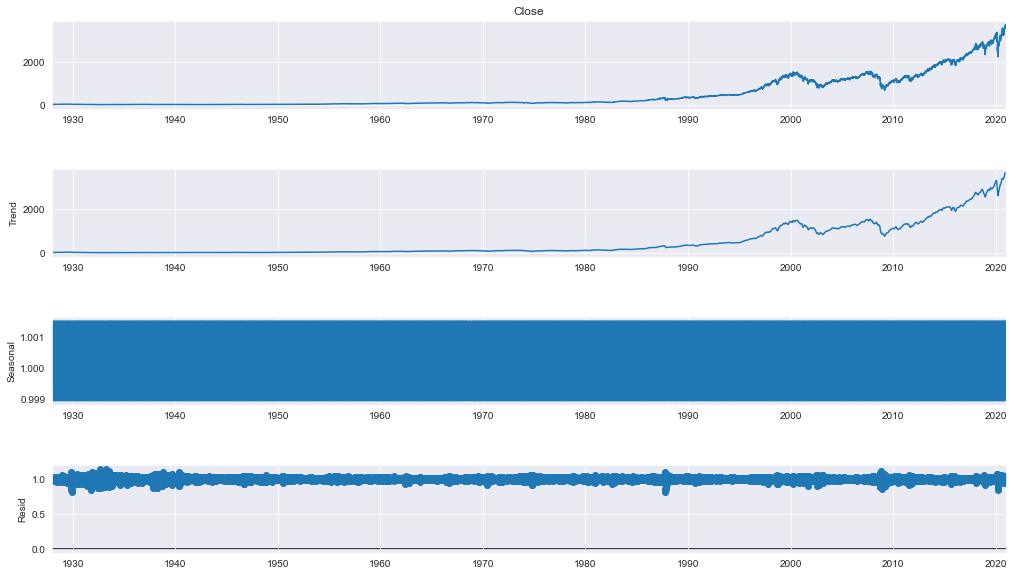

In [36]:
result = seasonal_decompose(stock_data['Close'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9) 


No handles with labels found to put in legend.


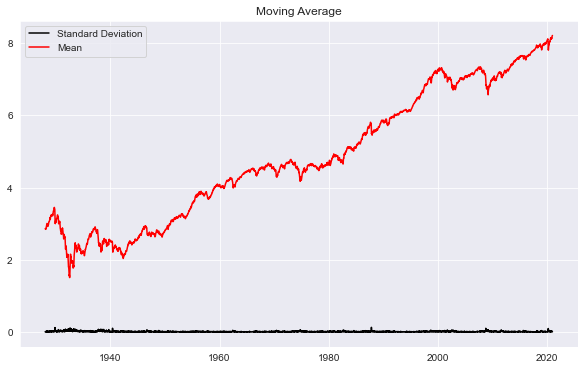

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(stock_data['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


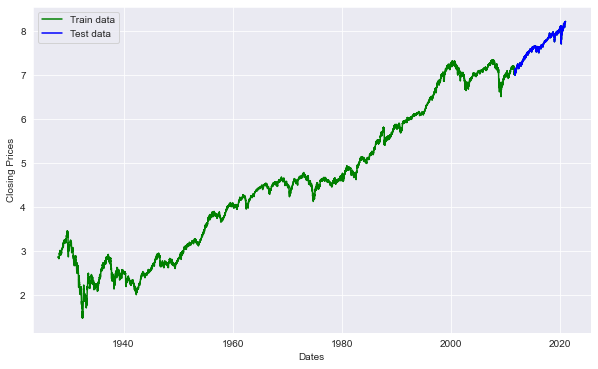

In [38]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

#### Build ARIMA model

In [39]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-125773.551, Time=4.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-125771.570, Time=5.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-125771.571, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-125769.787, Time=2.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-125769.772, Time=7.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 22.294 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                21019
Model:               SARIMAX(0, 1, 0)   Log Likelihood               62888.775
Date:                Tue, 29 Dec 2020   AIC                        -125773.551
Time:                        12:02:38   BIC                        -125757.644
Sample:                             0   HQIC                       -125768.359
                              - 21019                       

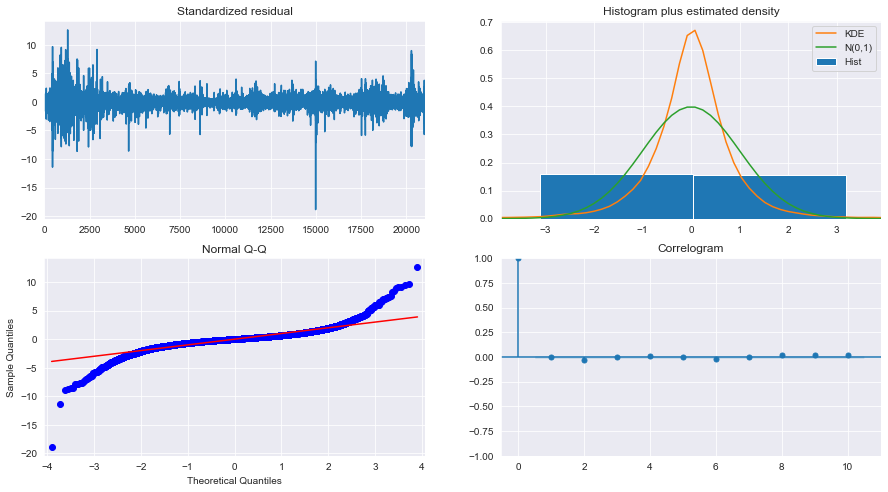

In [40]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

#### Ref:
Article: https://medium.com/@jdwittenauer/a-simple-time-series-analysis-of-the-s-p-500-index-b12ffdb13cd6#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImQ0Y2JhMjVlNTYzNjYwYTkwMDlkODIwYTFjMDIwMjIwNzA1NzRlODIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MDc1MzczNjUsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNTc4NjkzNTQ2OTI0OTc5OTUzOSIsImVtYWlsIjoiY2hyaXMubGlvdTAwN0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IkNocmlzdGluZSBMaW91IiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hLS9BT2gxNEdoSW5VMFJnc0lOcE5iUE5xQTJQTWpSM1pUWVQ0N0RGdzBNSlJiOWZRPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IkNocmlzdGluZSIsImZhbWlseV9uYW1lIjoiTGlvdSIsImlhdCI6MTYwNzUzNzY2NSwiZXhwIjoxNjA3NTQxMjY1LCJqdGkiOiJiM2FiZmVmNWZhNTQxYmJkNTIzZGI4OWQ5MTFkNTcwMzUwMmY4ZWVjIn0.qPYifosJqp3VKqNZhBD_KDeWQhjVXt85LAsj_boaAqKEC_0Boz8PVTmldEc9q_EcFnnbmN82LY9aRZ4-1u_pPQhViE-0BUM41LbiMwtoHlmaYt5SrY9h74OFs5dyb4OtbHPBH1o-ekYODNYTC3H3T7sIxU2_h7PzYuoXagaSt6-JSTUfzGUeZXkSmwN4VRGi1_caxqE900LN1twZ8r-mzYvRVEs9Dgiy0xXj4RGILahZCbm6AP8bxJhzzC1wTmD3o-_Uko-IiEfzV1u1y0zwMsHSPSPbyA5w-l1HRSuQ6xCwwhd3J07EAhOVF1w8jlUNgIe23bNwKqaLF0EnIGBJiA


Code: https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html